In [42]:
import ipympl
import numpy as np                      
import matplotlib.pyplot as plt
import scipy.signal as sig
import sounddevice as sd
from scipy.io import wavfile
%matplotlib ipympl

fs, data = wavfile.read("../AudioFile/Actual.wav")
# set data to float 32 to make program fast.
x_64 = data/0x8000
X_all = x_64[:,0]
# Devide audio into chuncks and define the audio clip i want to change
chuncks = 50
window_size = int(fs/40)
tot_samp = int(chuncks*window_size)

#Set start and stop of clip.
start_cut = int(11647130/2 + 130000)
stop_cut = int(start_cut+tot_samp)
x = X_all[start_cut:stop_cut] 

x_original = x.copy() # Keep original audio

start0 = 0
stop0 = window_size
U = []

In [45]:
#init n
N = window_size
n = np.arange(0, N)
f_pitch = 174.61
# loop trough audio
for i in range(chuncks):
    start = start0 + window_size*i
    stop = stop0 + window_size*i
    xn = x[start:stop] #defiene audio chunk
    
    wn = sig.windows.hann(N) #window function
    xw = xn*wn  # apply window to audio chunk
    Xm_w = np.fft.fft(xw) 
    
    Xm_win = np.abs(Xm_w)
    m_max = np.argmax(Xm_win[0:window_size//2]) # Find index m of highest pitch.
    f = m_max/N * fs# Calculate the highest pitch
    delta_f = f/f_pitch
    #### Change audio#####
    Xn = np.fft.fft(xn)
  
    new_windows_size =int(delta_f*window_size)
    #### convert back to audio signal####
    
    yn = np.fft.ifft(Xn)
    U[start:stop] = np.real(yn) # exchange new audio with old audio
    




1480.0
720.0
1400.0
680.0
680.0
680.0
680.0
680.0
640.0
1640.0
640.0
1680.0000000000002
1360.0
680.0
280.0
280.0
2320.0
2120.0
2080.0
680.0
680.0
680.0
680.0
680.0
2320.0
2320.0
2280.0
2320.0
2320.0
2360.0
2320.0
2280.0
2280.0
2280.0
2320.0
2320.0
2280.0
2280.0
320.0
320.0
2320.0
2280.0
2320.0
2320.0
2320.0
2320.0
2280.0
320.0
2760.0
1640.0


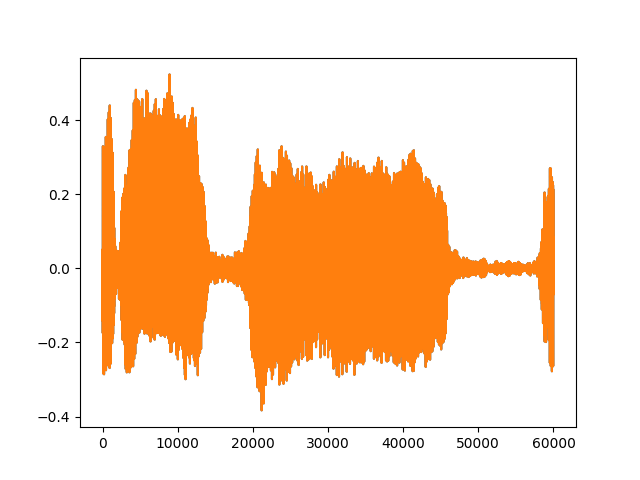

In [39]:
plt.figure()
plt.plot(np.arange(len(x)),x)
plt.plot(np.arange(len(x)),x_original)


In [40]:
sd.play(x_original) # Play original audio

In [34]:
sd.play(x) # Play new audio
sd.wait()